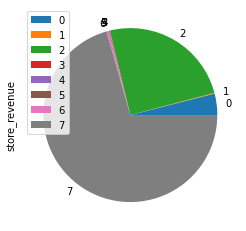

In [150]:
df1.plot(kind='pie', y='store_revenue',x='store_name')

In [147]:
!pip install pandas
!pip install requests

You are using pip version 19.0.2, however version 22.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 19.0.2, however version 22.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [148]:
import requests
import pandas as pd
import io
import json

In [149]:
request_body_sales_info = {
    "startDate": "2023-01-12T00:00:00+00:00",
    "endDate": "2023-01-12T23:59:59.999+00:00",
}
get_sales_info_url="http://localhost:3000/api/sales_info"
get_sales_info_product_url="http://localhost:3000/api/sales_info/product"
get_sales_info_store_url="http://localhost:3000/api/sales_info/store"
sales_info = json.loads(requests.get(get_sales_info_url, json=request_body_sales_info).text)
sales_info_product = json.loads(requests.get(get_sales_info_product_url, json=request_body_sales_info).text)
sales_info_store = json.loads(requests.get(get_sales_info_store_url, json=request_body_sales_info).text)


# Sales store plots

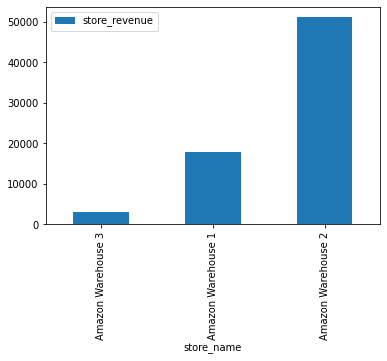

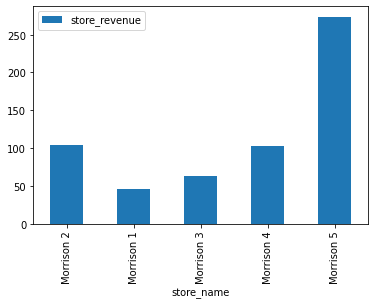

In [154]:
##Seperate into two dataframes, one for the warehouses selling non-fresh items and one for the stores 
#selling fresh items

df_warehouse = df1[ df1['store_is_warehouse']]
df_store = df1[df1['store_is_warehouse']==False]
df_warehouse.plot.bar(x='store_name', y='store_revenue')
df_store.plot.bar(x='store_name', y='store_revenue')

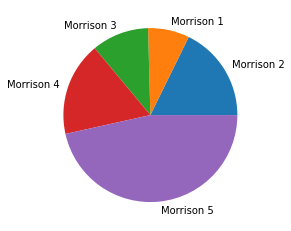

In [59]:
plt.pie(df_store['store_revenue'], labels = df_store['store_name'])
 
# show plot
plt.show()

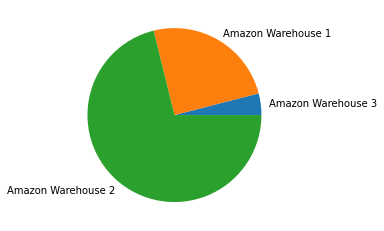

In [60]:
plt.pie(df_warehouse['store_revenue'], labels = df_warehouse['store_name'])
 
# show plot
plt.show()

# Product categories plots

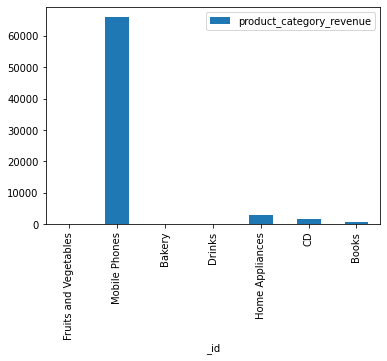

In [67]:
product_categories = pd.DataFrame(sales_info_product)

product_categories.plot.bar(x='_id', y='product_category_revenue')

In [164]:
#seperating products in two datafra,
fresh_products_df = product_categories[product_categories['_id']=='Drinks']
fresh_products_df = fresh_products_df.append(product_categories[product_categories['_id']=='Fruits and Vegetables'])
fresh_products_df = fresh_products_df.append(product_categories[product_categories['_id']=='Bakery'])

In [166]:
non_fresh_products_df = product_categories[product_categories['_id']=='CD']
non_fresh_products_df = non_fresh_products_df.append(product_categories[product_categories['_id']=='Books'])
non_fresh_products_df = non_fresh_products_df.append(product_categories[product_categories['_id']=='Home Appliances'])
non_fresh_products_df = non_fresh_products_df.append(product_categories[product_categories['_id']=='Mobile Phones'])


In [168]:
fresh_products

,_id,product_category_revenue
0,Fruits and Vegetables,39.93
2,Bakery,47.25
3,Drinks,71.56
3,Drinks,71.56
0,Fruits and Vegetables,39.93
2,Bakery,47.25


In [167]:
non_fresh_products

,_id,product_category_revenue
1,Mobile Phones,66015.70
5,CD,1557.80
6,Books,802.15
4,Home Appliances,2893.20


In [138]:
non_fresh_products = non_fresh_products.append(product_categories[product_categories['_id']=='Home Appliances'])

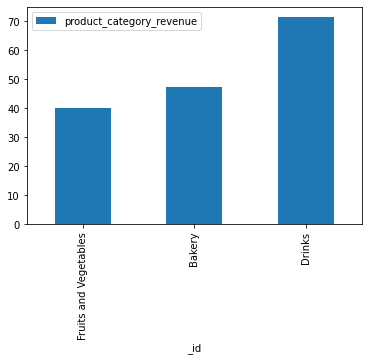

In [140]:

fresh_products.plot.bar(x='_id', y='product_category_revenue')
non_fresh_products.plot.bar(x='_id', y='product_category_revenue')


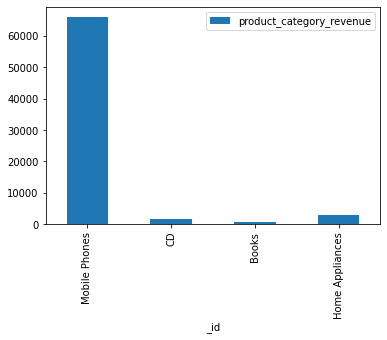

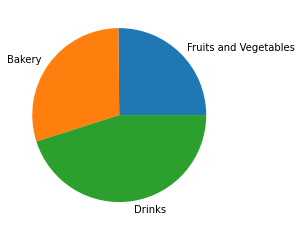

In [144]:
plt.pie(fresh_products['product_category_revenue'], labels = fresh_products['_id'])
 
# show plot
plt.show()

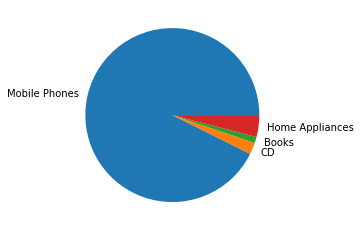

In [145]:
plt.pie(non_fresh_products['product_category_revenue'], labels = non_fresh_products['_id'])
 
# show plot
plt.show()

In [146]:
sales_info

[{'_id': None,
  'COGS': 27276.29,
  'revenue': 71427.59,
  'GPM': 44151.299999999996}]